In [2]:
import numpy as np
import time
import copy as cp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
%matplotlib notebook

In [3]:
# Previously saved dataframes contain:
# - 't': time (d)
# - 'femass': Ferric chloride mass dosed (g/d)
# - 'feconc': Ferric chloride dose (g/m3)
# - 'q_infl': Influent flow (m3/d)
# - 'q_effl': Primary effluent flow (m3/d)
# - 'xtss_infl': Influent total suspended solids (g/m3)
# - 'xtss_effl': Primary effluent total suspended solids (g/m3)
# - 'spo4_infl': Influent soluble phosphate (g/m3)
# - 'spo4_effl': Primary effluent soluble phosphate (g/m3)
# - 'tp_infl': Influent total phosphorus (g/m3)
# - 'tp_effl': Primary effluent total phosphorus (g/m3)

df_names = ["C:/Users/Sara/Desktop/sewerWRRF/data/results/temps/df_storm4_nc_femass2.0_temp30.0.pkl",
           #"C:/Users/Sara/Desktop/sewerWRRF/data/results/df_storm4_nc_femass_3Q1.pkl",
            
           #"C:/Users/Sara/Desktop/sewerWRRF/data/results/df_storm4_c_TSS_01_femass2.0.pkl",
           #"C:/Users/Sara/Desktop/sewerWRRF/data/results/df_storm4_c_TSS_01_femass_3Q1.pkl",
            
           #"C:/Users/Sara/Desktop/sewerWRRF/data/results/df_storm4_c_TSS_05_femass2.0.pkl",
           #"C:/Users/Sara/Desktop/sewerWRRF/data/results/df_storm4_c_TSS_05_femass_3Q1.pkl"
           ]

<IPython.core.display.Javascript object>


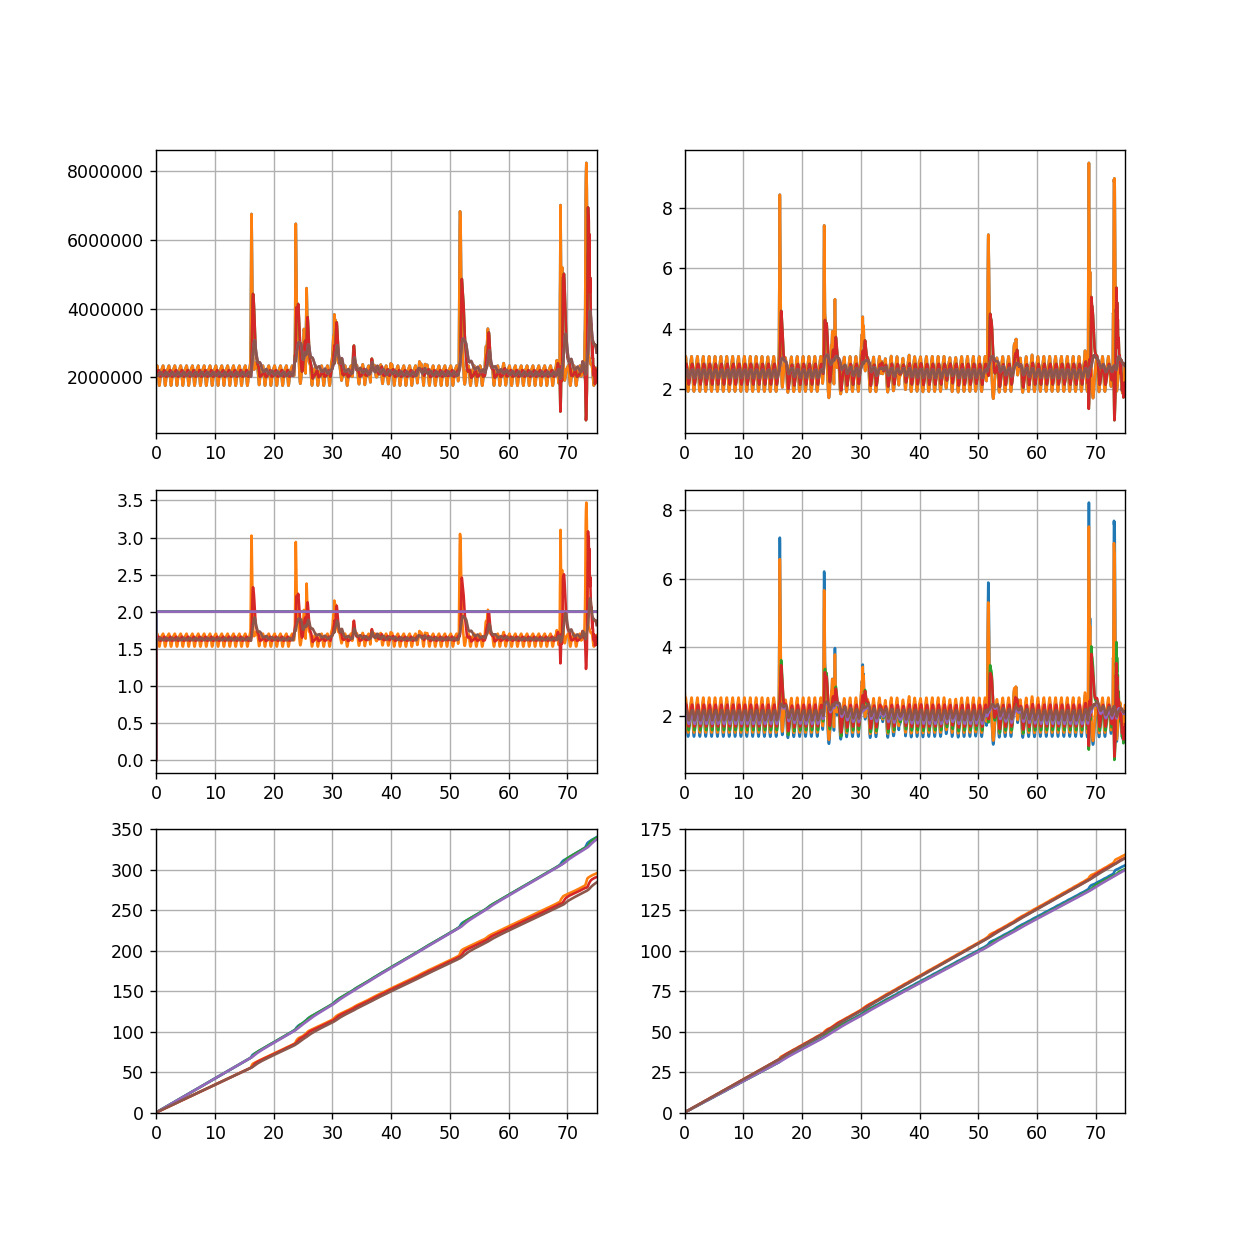

(27, 40)

In [13]:
start_time = 15
stop_time = 18

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(10,10))

for i in df_names:
    df_storm = pd.read_pickle(i)
    
    # Compute cumulative sum of ferric chloride mass dosed
    # Divided by 10^6 to get units of metric tons
    # Divided by (24*60/30) since sampled at 30 min intervals
    femass_cumulative = (np.divide(df_storm['femass'],1000000)/24/60*30).cumsum()
    
    # Compute SPO4 and TP load in primary effluent
    # (g/m3) * (m3/d)
    # Divided by 10^6 to get units of metric tons per day
    spo4_load = np.divide(np.multiply(df_storm['spo4_effl'],df_storm['q_effl']),1000000)
    tp_load = np.divide(np.multiply(df_storm['tp_effl'],df_storm['q_effl']),1000000)
    
    # Compute cumulative sum of SPO4 and TP load in primary effluent
    # Divided by (24*60/30) since sampled at 30 min intervals
    spo4_load_cumulative = (spo4_load/24/60*30).cumsum()
    tp_load_cumulative = (tp_load/24/60*30).cumsum()
    
    axes[0,0].plot(df_storm['t'],df_storm['q_infl'])
    axes[0,1].plot(df_storm['t'],np.divide(np.multiply(df_storm['spo4_infl'],df_storm['q_infl']),1000000))
    
    axes[1,0].plot(df_storm['t'],df_storm['feconc'])
    axes[1,1].plot(df_storm['t'],spo4_load)
    
    axes[2,0].plot(df_storm['t'],femass_cumulative)
    axes[2,1].plot(df_storm['t'],spo4_load_cumulative)
    #axes[2,1].plot(df_storm['t'],tp_load_cumulative)

axes[0,0].set_xlim([start_time,stop_time])
axes[0,1].set_xlim([start_time,stop_time])

axes[1,0].set_xlim([start_time,stop_time])
axes[1,1].set_xlim([start_time,stop_time])

axes[2,0].set_xlim([start_time,stop_time])
axes[2,0].set_ylim([50,80])
axes[2,1].set_xlim([start_time,stop_time])
axes[2,1].set_ylim([27,40])

In [4]:
# Adjust the axis limits of the above plots
start_time = 0
stop_time = 75

axes[0,0].set_xlim([start_time,stop_time])
axes[0,1].set_xlim([start_time,stop_time])

axes[1,0].set_xlim([start_time,stop_time])
axes[1,1].set_xlim([start_time,stop_time])

axes[2,0].set_xlim([start_time,stop_time])
axes[2,0].set_ylim([0,350])
axes[2,1].set_xlim([start_time,stop_time])
axes[2,1].set_ylim([0,175])

NameError: name 'axes' is not defined

<IPython.core.display.Javascript object>


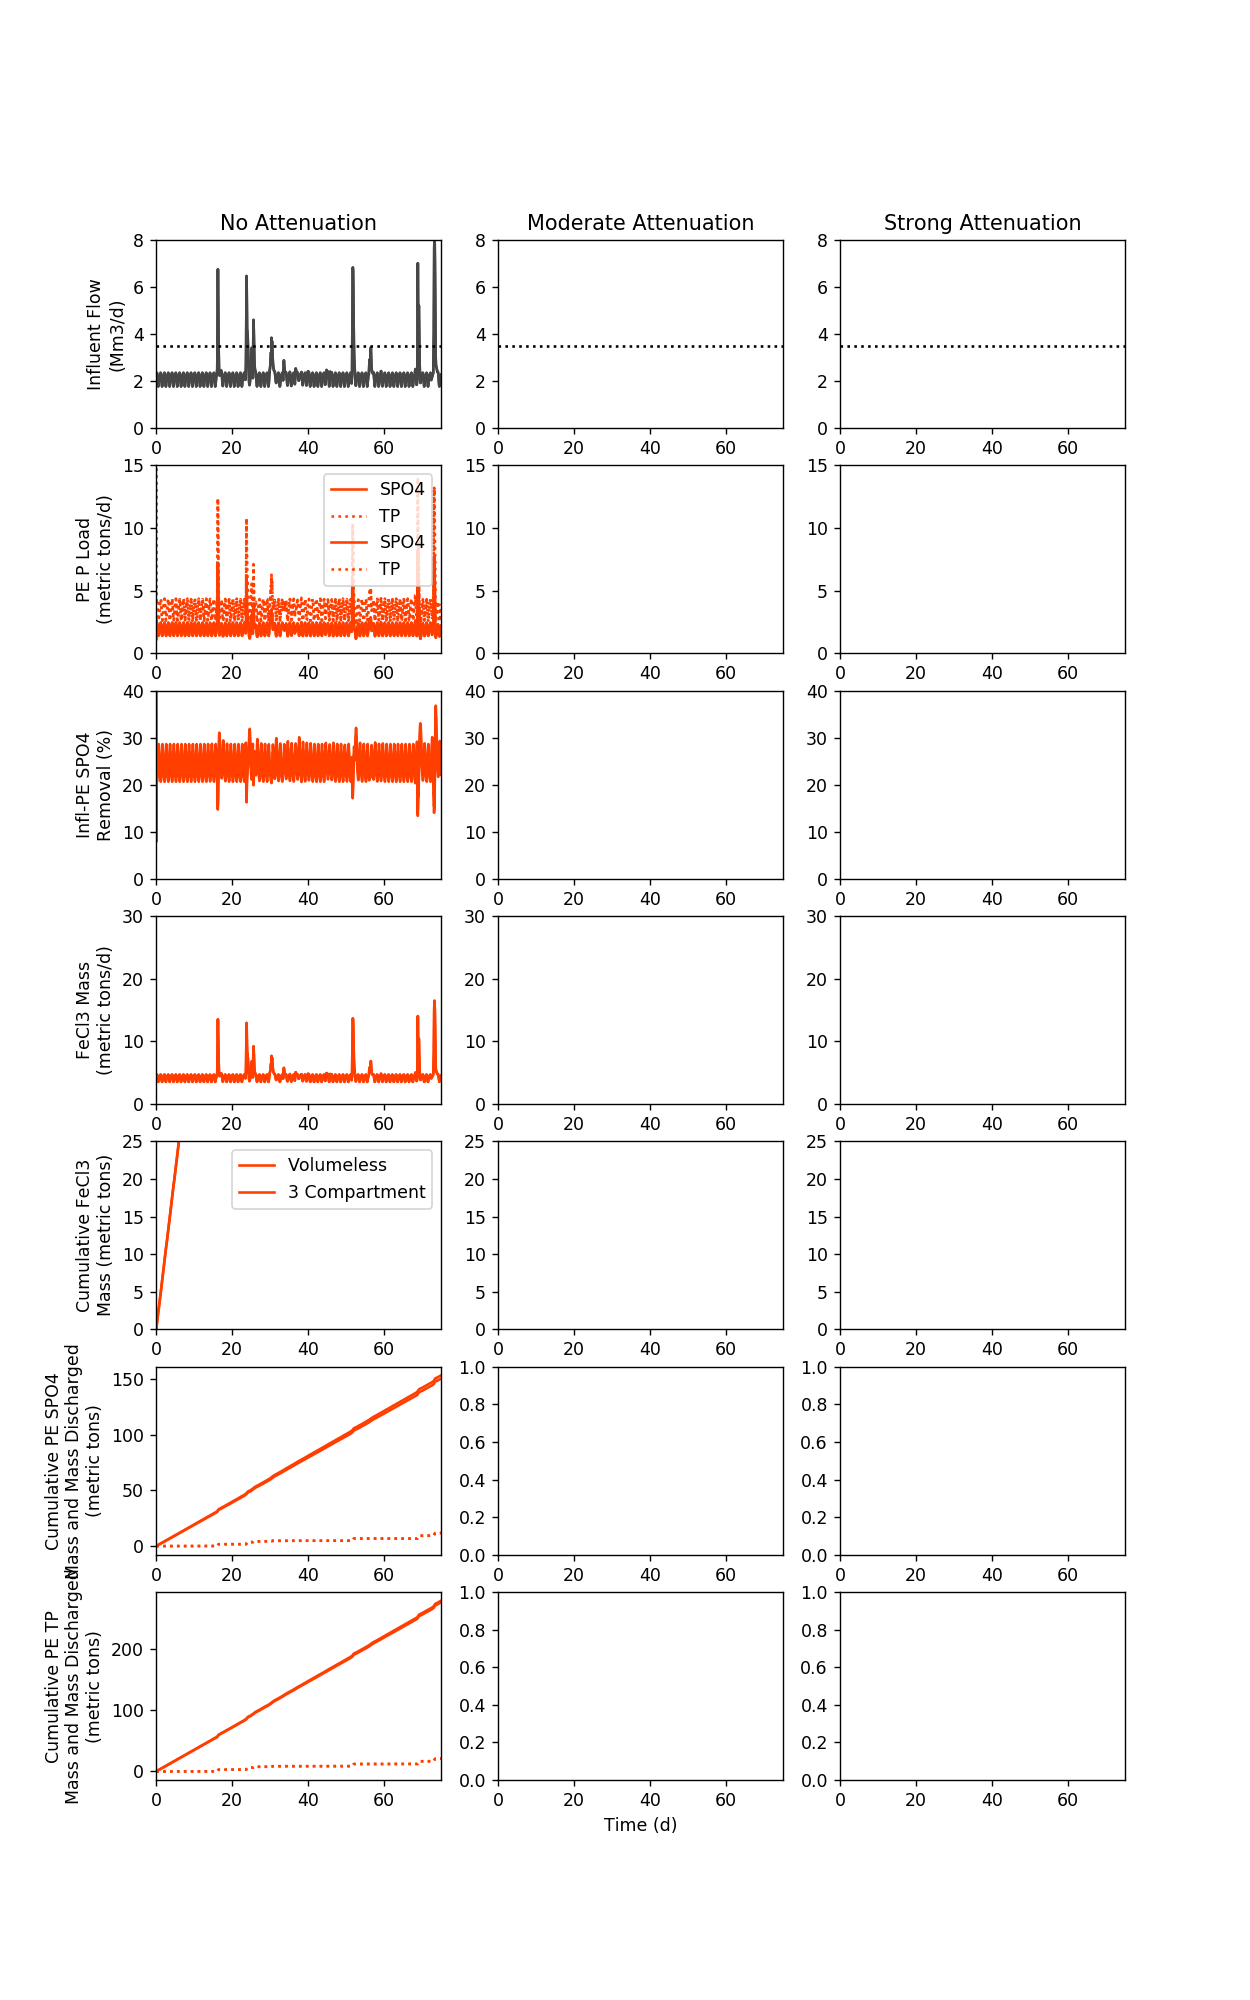

<IPython.core.display.Javascript object>


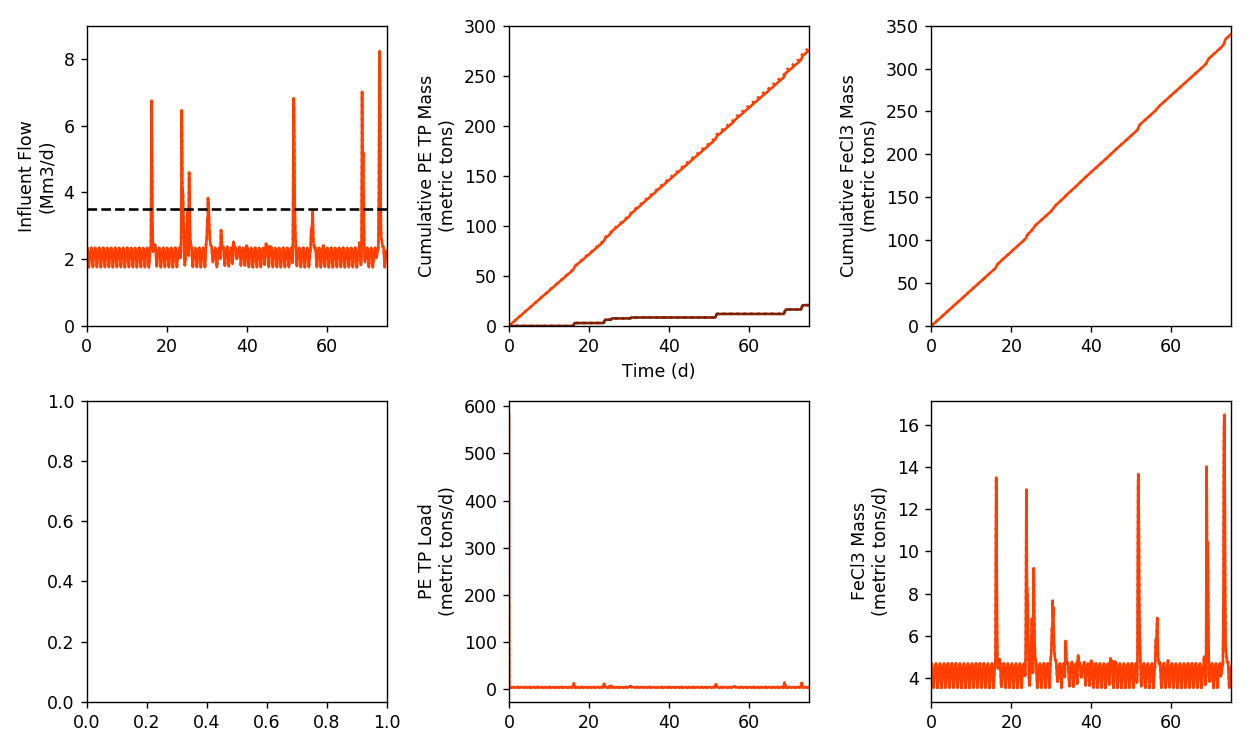

C:/Users/Sara/Desktop/sewerWRRF/data/results/df_storm4_nc_femass2.0.pkl
170.15926125000001
8.23767
340.3180416666677
8.227358256696947
176.9170297235598
0.1339055455847249
-8.926626864240681
153.3428671259746
277.81631924193135
11.815115451860212
20.940239101326142


C:/Users/Sara/Desktop/sewerWRRF/data/results/primaryComplex/df_storm4_nc_femass2.0.pkl
170.15926125000001
8.23767
340.31800854166744
8.097773758366513
581.81933300017
0.14754691282320864
-31.645265580812353
150.3919528397817
275.1135479795871
11.59626928286219
20.741395007428107




In [4]:
df_names = ["C:/Users/Sara/Desktop/sewerWRRF/data/results/df_storm4_nc_femass2.0.pkl",
            "C:/Users/Sara/Desktop/sewerWRRF/data/results/primaryComplex/df_storm4_nc_femass2.0.pkl"
           ]

plot_locs_col = [0,0,0]

colors = ['#ff3e00','#ff3e00']
labels = ['Volumeless','3 Compartment']

colors2 = ['#ff3e00','#ff3e00']
colors2a = ['#802000','#802000']
styles2 = [':','-']

# Storm events:
# - [15,19]
# - [22,29]
# - [29,34]
# - [50,59]
# - [67,72]
start_time = 0
stop_time = 75
start_index = start_time*24*60/30
stop_index = stop_time*24*60/30

# figsize is width,height
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(10,16))

fig2, axes2 = plt.subplots(nrows=2,ncols=3, figsize=(10,6))
plt.rcParams['axes.grid'] = True

for i in range(0,len(df_names)):
    df_storm = pd.read_pickle(df_names[i])
    
    print(df_names[i])
    
    # Get total volume of storm (in start_index:stop_index)
    # Divided by 10^6 to get units of Mm3
    # Divided by (24*60/30) since sampled at 30 min intervals
    stormVol = np.sum(df_storm['q_infl'][int(start_index):int(stop_index)]) / 1000000 /24/60*30
    #print('Storm vol (Mm3): ')
    print(stormVol)
    
    # Get peak of influent flow of storm (in start_index:stop_index)]
    # Divided by 10^6 to get units of Mm3/d
    stormPeak = np.amax(df_storm['q_infl'][int(start_index):int(stop_index)]) / 1000000
    #print('Storm peak (Mm3/d): ')
    print(stormPeak)
    
    # Compute cumulative sum of ferric chloride mass dosed
    # Divided by 10^6 to get units of metric tons
    # Divided by (24*60/30) since sampled at 30 min intervals
    femass_cumulative = (np.divide(df_storm['femass'],1000000)/24/60*30).cumsum()
    femass_cumulative_narray = np.array(femass_cumulative)
    #print('Cumulative Fe mass added (metric tons): ')
    print(femass_cumulative_narray[int(stop_index)]-femass_cumulative_narray[int(start_index)])
    
    # Get SPO4 and TP load in influent and primary effluent
    # (g/m3) * (m3/d)
    # Divided by 10^6 to get units of metric tons per day
    spo4_IN_load = np.divide(np.multiply(df_storm['spo4_infl'],df_storm['q_infl']),1000000)
    tp_IN_load = np.divide(np.multiply(df_storm['tp_infl'],df_storm['q_infl']),1000000)
    spo4_PE_load = np.divide(np.multiply(df_storm['spo4_effl'],df_storm['q_effl']),1000000)
    tp_PE_load = np.divide(np.multiply(df_storm['tp_effl'],df_storm['q_effl']),1000000)
    
    # Get SPO4 and TP load peaks in influent and primary effluent
    # Units will be metric tons/d
    spo4_IN_load_peak = np.amax(spo4_IN_load[int(start_index):int(stop_index)])
    tp_IN_load_peak = np.amax(tp_IN_load[int(start_index):int(stop_index)])
    spo4_PE_load_peak = np.amax(spo4_PE_load[int(start_index):int(stop_index)])
    tp_PE_load_peak = np.amax(tp_PE_load[int(start_index):int(stop_index)])
    spo4_load_peak_red = (spo4_IN_load_peak - spo4_PE_load_peak)/spo4_IN_load_peak
    tp_load_peak_red = (tp_IN_load_peak - tp_PE_load_peak)/tp_IN_load_peak
    #print('PE SPO4 load peak (metric tons/d): ')
    print(spo4_PE_load_peak)
    #print('PE TP load peak (metric tons/d): ')
    print(tp_PE_load_peak)
    #print('Reduction in SPO4 load peak (frac): ')
    print(spo4_load_peak_red)
    #print('Reduction in TP load peak (frac): ')
    print(tp_load_peak_red)
    
    # Compute SPO4 and TP load removal
    # (influent load - primary effluent load) / influent load
    spo4_load_removal = np.divide(np.subtract(spo4_IN_load,spo4_PE_load),spo4_IN_load)
    tp_load_removal = np.divide(np.subtract(tp_IN_load,tp_PE_load),tp_IN_load)
    
    # Compute cumulative sum of SPO4 and TP load in primary effluent
    # Divided by (24*60/30) since sampled at 30 min intervals
    # Units will be metric tons
    spo4_PE_load_cumulative = (spo4_PE_load/24/60*30).cumsum()
    tp_PE_load_cumulative = (tp_PE_load/24/60*30).cumsum()
    spo4_PE_load_cumulative_narray = np.array(spo4_PE_load_cumulative)
    tp_PE_load_cumulative_narray = np.array(tp_PE_load_cumulative)
    #print('Cumulative PE SPO4 load (metric tons): ')
    print(spo4_PE_load_cumulative_narray[int(stop_index)]-spo4_PE_load_cumulative[int(start_index)])
    #print('Cumulative PE TP load (metric tons): ')
    print(tp_PE_load_cumulative_narray[int(stop_index)]-tp_PE_load_cumulative[int(start_index)])
    
    # Compute primary effluent discharge when over 3.5 Mm3/d
    # q units of Mm3
    # spo4/tp load units of metric tons
    if_discharge = np.where(df_storm['q_effl'] > 3500000, 1, 0)
    q_discharge = np.where(df_storm['q_effl'] > 3500000, df_storm['q_effl'], 0) / 24/60*30 / 1000000
    q_discharge_cum = q_discharge.cumsum()
    spo4_load_discharge = np.where(df_storm['q_effl'] > 3500000, spo4_PE_load, 0) / 24/60*30
    spo4_load_discharge_cum = spo4_load_discharge.cumsum()
    tp_load_discharge = np.where(df_storm['q_effl'] > 3500000, tp_PE_load, 0) / 24/60*30
    tp_load_discharge_cum = tp_load_discharge.cumsum()
    #print('Cumulative SPO4 load discharged (metric tons): ')
    print(spo4_load_discharge_cum[int(stop_index)]-spo4_load_discharge_cum[int(start_index)])
    #print('Cumulative TP load discharged (metric tons): ')
    print(tp_load_discharge_cum[int(stop_index)]-tp_load_discharge_cum[int(start_index)])
    
    print('\n')
    
    axes[0,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  np.divide(df_storm['q_infl'],1000000)[int(start_index):int(stop_index)],
                                  color='#474747')
    
    #axes[1,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
    #                              df_storm['spo4_effl'][int(start_index):int(stop_index)],
    #                              color=colors[i])
    
    axes[1,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  spo4_PE_load[int(start_index):int(stop_index)],
                                  color=colors[i],
                                  label='SPO4')
    axes[1,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  tp_PE_load[int(start_index):int(stop_index)],
                                  ':',
                                  color=colors[i],
                                  label='TP')
    
    axes[2,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  np.multiply(spo4_load_removal,100)[int(start_index):int(stop_index)],
                                  color=colors[i])
    
    axes[3,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  np.divide(df_storm['femass'],1000000)[int(start_index):int(stop_index)],
                                  color=colors[i])
    
    axes[4,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  np.subtract(femass_cumulative[int(start_index):int(stop_index)],femass_cumulative[int(start_index)]),
                                  color=colors[i],
                                  label=labels[i])
    
    axes[5,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  np.subtract(spo4_PE_load_cumulative[int(start_index):int(stop_index)],spo4_PE_load_cumulative[int(start_index)]),
                                  color=colors[i])
    axes[5,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  np.subtract(spo4_load_discharge_cum[int(start_index):int(stop_index)],spo4_load_discharge_cum[int(start_index)]),
                                  ':',
                                  color=colors[i])
    #axes[5,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
    #                              tp_IN_load[int(start_index):int(stop_index)],
    #                              ':',
    #                              color=colors[i])
    #axes[5,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
    #                              tp_PE_load[int(start_index):int(stop_index)],
    #                              color=colors[i])
    
    axes[6,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  np.subtract(tp_PE_load_cumulative[int(start_index):int(stop_index)],tp_PE_load_cumulative[int(start_index)]),
                                  color=colors[i])
    axes[6,plot_locs_col[i]].plot(df_storm['t'][int(start_index):int(stop_index)],
                                  np.subtract(tp_load_discharge_cum[int(start_index):int(stop_index)],tp_load_discharge_cum[int(start_index)]),
                                  ':',
                                  color=colors[i])
    
    axes2[0,0].plot(df_storm['t'][int(start_index):int(stop_index)],
                  np.divide(df_storm['q_infl'],1000000)[int(start_index):int(stop_index)],
                  styles2[i],
                  color=colors2[i])
    
    axes2[0,1].plot(df_storm['t'][int(start_index):int(stop_index)],
                 np.subtract(tp_PE_load_cumulative[int(start_index):int(stop_index)],tp_PE_load_cumulative[int(start_index)]),
                 styles2[i],
                 color=colors2[i])
    axes2[0,1].plot(df_storm['t'][int(start_index):int(stop_index)],
                 np.subtract(tp_load_discharge_cum[int(start_index):int(stop_index)],tp_load_discharge_cum[int(start_index)]),
                 styles2[i],
                 color=colors2a[i])
    axes2[1,1].plot(df_storm['t'][int(start_index):int(stop_index)],
                 tp_PE_load[int(start_index):int(stop_index)],
                 styles2[i],
                 color=colors2[i])
    
    axes2[0,2].plot(df_storm['t'][int(start_index):int(stop_index)],
                  np.subtract(femass_cumulative[int(start_index):int(stop_index)],femass_cumulative[int(start_index)]),
                  styles2[i],
                  color=colors2[i])
    axes2[1,2].plot(df_storm['t'][int(start_index):int(stop_index)],
                   np.divide(df_storm['femass'],1000000)[int(start_index):int(stop_index)],
                   styles2[i],
                   color=colors2[i])

axes2[0,0].plot([start_time,stop_time],[3.5,3.5],'--',color='#000000')
axes2[0,0].set_ylabel('Influent Flow\n(Mm3/d)')
axes2[0,1].set_ylabel('Cumulative PE TP Mass\n(metric tons)')
axes2[1,1].set_ylabel('PE TP Load\n(metric tons/d)')
axes2[0,2].set_ylabel('Cumulative FeCl3 Mass\n(metric tons)')
axes2[1,2].set_ylabel('FeCl3 Mass\n(metric tons/d)')
axes2[0,1].set_xlabel('Time (d)')

axes2[0,0].set_xlim([start_time,stop_time])
axes2[0,1].set_xlim([start_time,stop_time])
axes2[1,1].set_xlim([start_time,stop_time])
axes2[0,2].set_xlim([start_time,stop_time])
axes2[1,2].set_xlim([start_time,stop_time])
axes2[0,0].set_ylim([0,9])
axes2[0,1].set_ylim([0,300])
axes2[0,2].set_ylim([0,350])


axes[0,0].set_ylabel('Influent Flow\n(Mm3/d)')
#axes[1,0].set_ylabel('PE SPO4\n(g/m3)')
axes[1,0].set_ylabel('PE P Load\n(metric tons/d)')
axes[2,0].set_ylabel('Infl-PE SPO4\nRemoval (%)')
axes[3,0].set_ylabel('FeCl3 Mass\n(metric tons/d)')
axes[4,0].set_ylabel('Cumulative FeCl3\nMass (metric tons)')
axes[5,0].set_ylabel('Cumulative PE SPO4\nMass and Mass Discharged\n(metric tons)')
axes[6,0].set_ylabel('Cumulative PE TP\nMass and Mass Discharged\n(metric tons)')
axes[6,1].set_xlabel('Time (d)')

axes[0,0].set_title('No Attenuation')
axes[0,1].set_title('Moderate Attenuation')
axes[0,2].set_title('Strong Attenuation')

axes[0,0].plot([start_time,stop_time],[3.5,3.5],':',color='#000000')
axes[0,1].plot([start_time,stop_time],[3.5,3.5],':',color='#000000')
axes[0,2].plot([start_time,stop_time],[3.5,3.5],':',color='#000000')
axes[0,0].set_xlim([start_time,stop_time])
axes[0,1].set_xlim([start_time,stop_time])
axes[0,2].set_xlim([start_time,stop_time])
axes[0,0].set_ylim([0,8])
axes[0,1].set_ylim([0,8])
axes[0,2].set_ylim([0,8])

#axes[1,0].set_xlim([start_time,stop_time])
#axes[1,1].set_xlim([start_time,stop_time])
#axes[1,2].set_xlim([start_time,stop_time])
#axes[1,0].set_ylim([0.5,1.3])
#axes[1,1].set_ylim([0.5,1.3])
#axes[1,2].set_ylim([0.5,1.3])

axes[1,0].set_xlim([start_time,stop_time])
axes[1,1].set_xlim([start_time,stop_time])
axes[1,2].set_xlim([start_time,stop_time])
axes[1,0].set_ylim([0,15])
axes[1,1].set_ylim([0,15])
axes[1,2].set_ylim([0,15])
axes[1,0].legend()

axes[2,0].set_xlim([start_time,stop_time])
axes[2,1].set_xlim([start_time,stop_time])
axes[2,2].set_xlim([start_time,stop_time])
axes[2,0].set_ylim([0,40])
axes[2,1].set_ylim([0,40])
axes[2,2].set_ylim([0,40])

axes[3,0].set_xlim([start_time,stop_time])
axes[3,1].set_xlim([start_time,stop_time])
axes[3,2].set_xlim([start_time,stop_time])
axes[3,0].set_ylim([0,30])
axes[3,1].set_ylim([0,30])
axes[3,2].set_ylim([0,30])

axes[4,0].set_xlim([start_time,stop_time])
axes[4,1].set_xlim([start_time,stop_time])
axes[4,2].set_xlim([start_time,stop_time])
axes[4,0].set_ylim([0,25])
axes[4,1].set_ylim([0,25])
axes[4,2].set_ylim([0,25])
axes[4,0].legend()

axes[5,0].set_xlim([start_time,stop_time])
axes[5,1].set_xlim([start_time,stop_time])
axes[5,2].set_xlim([start_time,stop_time])
#axes[5,0].set_ylim([0,12])
#axes[5,1].set_ylim([0,12])
#axes[5,2].set_ylim([0,12])

axes[6,0].set_xlim([start_time,stop_time])
axes[6,1].set_xlim([start_time,stop_time])
axes[6,2].set_xlim([start_time,stop_time])

plt.tight_layout()
plt.savefig("C:/Users/Sara/Desktop/sewerWRRF/data/results/primaryComplex/df_storm4_summ_all.svg")